In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import os

Let's define a function to load the dataset

In [2]:
def load_img_dataset_train(datadir, categories):

    datadir = datadir + "train/"
    X = []
    Y = []

    for category in categories:
        path = os.path.join(datadir, category)
        class_number = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            X.append(img_array)
            Y.append(class_number)

    return np.array(X), np.array(Y)

In [3]:
def load_img_dataset_test(datadir, categories):

    datadir = datadir + "test/"
    X = []
    Y = []

    for category in categories:
        path = os.path.join(datadir, category)
        class_number = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            X.append(img_array)
            Y.append(class_number)

    return np.array(X), np.array(Y)

In [32]:
categories = ["other", "dog"]
datadir = "ImgDataset/"

X_data, Y_data = load_img_dataset_train(datadir, categories)
X_test, Y_test = load_img_dataset_test(datadir, categories)

print(X_data.shape)
print(Y_data.shape)

(2400, 64, 64)
(2400,)


In [34]:
X_data = np.expand_dims(X_data, axis=3)
X_test = np.expand_dims(X_test, axis=3)
print(X_temp.shape)
print("¡Data ready!")

(2400, 64, 64, 1)
¡Data ready!


See some examples from the data to confirm that it have been loaded successfully

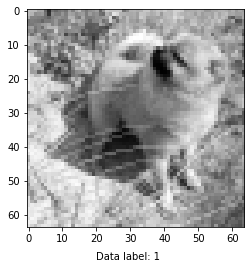

In [25]:
index = 1200

plt.imshow(X_data[index], cmap='gray')
plt.figtext(0.42, 0.01, "Data label: " + str(Y_data[index]))
plt.show()

Split data into test set and train set, the development set will not be defined yet

Creating the model with Keras Layers

In [26]:
def dog_classifier_model():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    """
    model = tf.keras.Sequential([
        tf.keras.layers.ZeroPadding2D((0,0), input_shape=(64,64,1)),
            ## Conv2D with 32 7x7 filters and stride of 1
        tf.keras.layers.Conv2D(32, (7,7)),
            ## BatchNormalization for axis 3
        tf.keras.layers.BatchNormalization(axis=3),
            ## ReLU
        tf.keras.layers.ReLU(),
            ## Max Pooling 2D with default parameters
        tf.keras.layers.MaxPool2D(),
            ## Flatten layer
        tf.keras.layers.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
        tf.keras.layers.Dense(1, activation="sigmoid")
            # YOUR CODE STARTS HERE
            
            
            # YOUR CODE ENDS HERE
    ])

    return model

Now compile the previous model with adam optimizer, binary loss and one metric that is accuracy

In [59]:
dog_model = dog_classifier_model()
dog_model.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy']
                    )

See a fast summary to check the model, this time we have 28.577 of trainable parameters

In [60]:
dog_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_3 (ZeroPaddin (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 32)        1600      
_________________________________________________________________
batch_normalization_3 (Batch (None, 58, 58, 32)        128       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 58, 58, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 26912)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

¡Train the model! :)

In [61]:
history = dog_model.fit(x=X_temp, y=Y_data, epochs=20, shuffle=True)

Epoch 1/20
75/75 [==============================] - 13s 167ms/step - loss: 1.1248 - accuracy: 0.5925
Epoch 2/20
75/75 [==============================] - 13s 173ms/step - loss: 0.8551 - accuracy: 0.6404
Epoch 3/20
75/75 [==============================] - 12s 164ms/step - loss: 0.6670 - accuracy: 0.7142
Epoch 4/20
75/75 [==============================] - 10s 138ms/step - loss: 0.4952 - accuracy: 0.7738
Epoch 5/20
75/75 [==============================] - 12s 155ms/step - loss: 0.5408 - accuracy: 0.7629s -
Epoch 6/20
75/75 [==============================] - 10s 136ms/step - loss: 0.4511 - accuracy: 0.8000
Epoch 7/20
75/75 [==============================] - 10s 136ms/step - loss: 0.3846 - accuracy: 0.8246
Epoch 8/20
75/75 [==============================] - 10s 137ms/step - loss: 0.3258 - accuracy: 0.8583
Epoch 9/20
75/75 [==============================] - 10s 138ms/step - loss: 0.2874 - accuracy: 0.8813
Epoch 10/20
75/75 [==============================] - 10s 130ms/step - loss: 0.2984 - acc

See the History

C:\Users\Giova\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

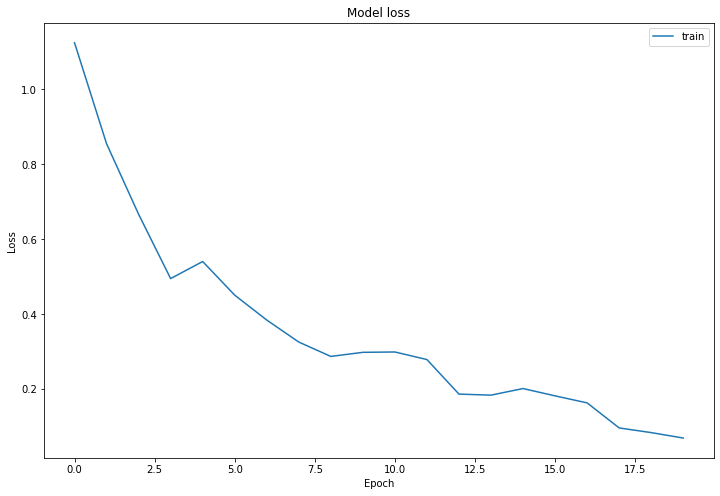

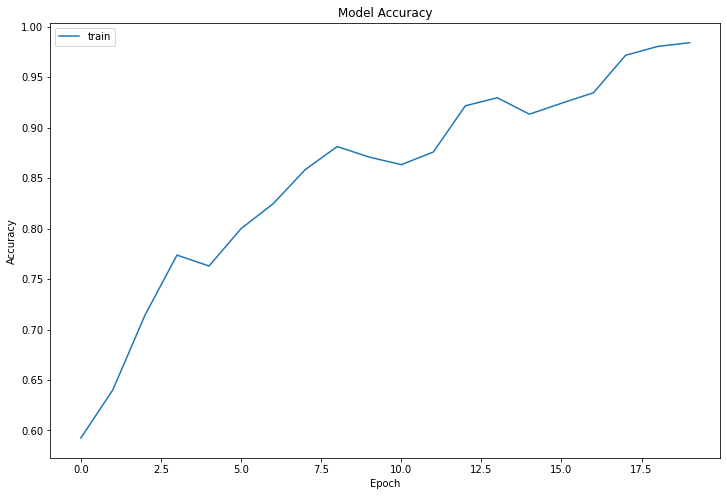

In [62]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss']]
df_loss.rename(columns={'loss':'train'},inplace=True)
df_acc= df_loss_acc[['accuracy']]
df_acc.rename(columns={'accuracy':'train'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

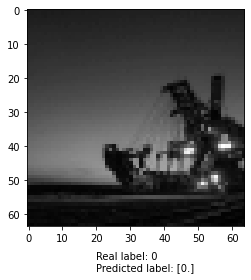

In [63]:
index_predict = 210

Y_hat = dog_model.predict(X_test)

plt.imshow(np.squeeze(X_test[index_predict]), cmap='gray')
plt.figtext(0.42, 0.01, "Real label: " + str(Y_test[index_predict]))
plt.figtext(0.42, -0.03, "Predicted label: " + str(np.around(Y_hat[index_predict])))
plt.show()

In [64]:
eval_ = dog_model.evaluate(x=X_test, y=Y_test)

25/25 [==============================] - 1s 41ms/step - loss: 0.8545 - accuracy: 0.7513
